In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## This shit was useful
https://github.com/jeromekelleher/spg-chapter/tree/master/jupyter

In [58]:
df = pd.DataFrame(np.random.randint(0,100,size=(4, 10000)))
%timeit df.sample(1, axis=1)
%timeit np.random.choice(list(df.iloc[1]))

1000 loops, best of 3: 504 µs per loop
1000 loops, best of 3: 972 µs per loop


In [59]:
tmplist = list(df.iloc[1])
%timeit np.random.choice(tmplist, 1)

1000 loops, best of 3: 499 µs per loop


In [60]:
#np.zeros(len(data.abundances))\
tmplist = np.ones(10000)/10000
%timeit np.random.multinomial(1, tmplist)

1000 loops, best of 3: 439 µs per loop


In [2]:
import MESS
import msprime
sp = MESS.species.species(abundance = 100,\
                          meta_abundance = 100,\
                          colonization_time = 1000)
self=sp
if True:
    if True:
        migmat = [[0, self.stats["migration_rate"]],
                    [0, 0]]

        pop_local = msprime.PopulationConfiguration(\
                        sample_size = self.paramsdict["sample_size_local"],\
                        initial_size = self.stats["Ne_local"],
                        growth_rate = self.stats["growth_rate"])

        pop_meta = msprime.PopulationConfiguration(\
                        sample_size=self.paramsdict["sample_size_meta"],\
                        initial_size=self.stats["Ne_meta"])

        ## Going backwards in time, at colonization time throw all lineages from
        ## the local community back into the metacommunity
        split_event = msprime.MassMigration(time = self.stats["coltime"],\
                                            source = 0,\
                                            destination = 1,\
                                            proportion = 1)

        local_rate_change = msprime.PopulationParametersChange(\
                                            time = self.stats["coltime"] - 1,\
                                            growth_rate = 0,\
                                            population_id = 0)

        ## TODO: Could mess with 'initial_size' here, but you don't want
        ## to sample too much from the metacommunity or the local pi
        ## goes way up.
        local_size_change = msprime.PopulationParametersChange(\
                                            time = self.stats["coltime"] - 1,\
                                            initial_size = 1,\
                                            population_id = 0)

        migrate_change = msprime.MigrationRateChange(
                                            time = self.stats["coltime"] - 1,\
                                            rate = 0)

        ## Useful for debugging demographic events.
        debug = msprime.DemographyDebugger( population_configurations = [pop_local, pop_meta],\
                                            migration_matrix = migmat,\
                                            demographic_events=[local_rate_change,\
                                                                local_size_change,\
                                                                migrate_change,\
                                                                split_event])

        ## Enable this at your own peril, it will dump a ton of shit to stdout
        #debug.print_history()
        ## I briefly toyed with the idea of logging this to a file, but you really
        ## don't need it that often, and it'd be a pain to get the outdir in here.
        #if LOGGER.getEffectiveLevel() == 10:
        #    debugfile = os.path.join(self._hackersonly["outdir"],
        #                        self.paramsdict["name"] + "-simout.txt")
        #    with open(debugfile, 'a') as outfile:
        #        outfile.write(debug.print_history())

        self.tree_sequence = msprime.simulate( length = self.paramsdict["sequence_length"],\
                                                Ne = self.stats["Ne_local"],\
                                                mutation_rate = self.paramsdict["mutation_rate"],\
                                                population_configurations = [pop_local, pop_meta],\
                                                migration_matrix = migmat,\
                                                demographic_events=[local_rate_change,\
                                                                    local_size_change,\
                                                                    migrate_change,\
                                                                    split_event])
        self.get_sumstats()
print(self)
print(migrate_change.time)
debug.epochs
local_size_change.population

/home/isaac/miniconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


name                         
coltime                  1000
migration_rate              0
growth_rate                 0
Ne_local                10000
Ne_meta                 10000
segsites_tot                5
segsites_local              2
segsites_meta               3
pi_tot            0.000293838
pi_local          0.000203438
pi_meta           0.000375332
da                8.86054e-06
dxy               0.000298246
tajd_local           -1.07588
999


0

In [3]:
import MESS
reg = MESS.Region("wat")
reg.add_local_community("watdo", 5000, 0.05)
reg.islands["watdo"].paramsdict['speciation_probability'] = 0.005
reg.simulate(_lambda=0.5)
isl1 = reg.islands["watdo"]
isl1.simulate_seqs()

/home/isaac/miniconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Bad pi name                    t556
coltime                48001
migration_rate    0.00049999
growth_rate                0
Ne_local                  10
Ne_meta                10251
segsites_tot             350
segsites_local             0
segsites_meta            347
pi_tot              0.212216
pi_local                   0
pi_meta             0.272632
da                  0.144211
dxy                 0.280526
tajd_local               NaN
Bad pi name                     t340
coltime                 62187
migration_rate    0.000659302
growth_rate                 0
Ne_local                   14
Ne_meta                 15728
segsites_tot              346
segsites_local              0
segsites_meta             343
pi_tot               0.160896
pi_local                    0
pi_meta              0.247758
da                  0.0703314
dxy                  0.194211
tajd_local                NaN


In [4]:
from MESS.species import species, sim_clade
import pandas as pd

clades = isl1._get_clades()
#print(clades)

## Ignore SetWithCopyWarning in pandas
pd.options.mode.chained_assignment = None

## Populate the local_info
isl1.local_info.loc["meta_abund"] = [isl1.region.get_abundance(x) for x in isl1.local_info]
isl1.local_info.loc["local_abund"] = [isl1.local_community.count(x) for x in isl1.local_info]
#isl1.local_info.loc["colonization_times"] = isl1.current_time - isl1.local_info.loc["colonization_times"]

for clade, sp in clades.items():
    df = isl1.local_info[sp]
    wat = [{isl1.current_time - x:y for x, y in isl1.local_info[z]["abundances_through_time"].items()} for z in sp]
    df.loc["abundances_through_time"] = wat
    #print(type(df))
    #print(df.columns)
    try:
        sim_clade(df)
    except Exception as inst:
        print(inst)
        print(df)

print(clades)

## A Single lineage
print(clades["t776"])
## A lineage with speciation
print(clades["t130"])
## Lots of lineages
print(clades["t177"])
#print(isl1.local_info[clades["t19"]])


float division by zero
                                                                         t338  \
colonization_times                                                          0   
post_colonization_migrants                                                162   
abundances_through_time     {34524: 3725, 4524: 2637, 44524: 4050, 24524: ...   
ancestor                                                                        
meta_abund                                                              56681   
local_abund                                                              2463   

                                                               t338:watdo-192  \
colonization_times                                                        192   
post_colonization_migrants                                                  0   
abundances_through_time     {34524: 28, 64332: 1, 14524: 9, 24524: 20, 452...   
ancestor                                                                 t338   
meta

KeyError: 't776'

In [ ]:
import msprime
from collections import OrderedDict

def sim_cl(forward_info):
    ## Build the nasty msprime command for species all related
    ## by local speciation. Run the msprime, and gather summary
    ## statistics

    ## Get species objects for each species in this clade
    clade_species = [species.from_df(pd.DataFrame(forward_info[x])) for x in forward_info]
    print("Got clade_species:\n{}".format(clade_species))

    ## Get msprime PopulationConfigurations per species
    ## Not sure why this has to be a dict...
    local_configs = OrderedDict({x:y._get_local_configuration() for x,y in enumerate(clade_species)})
    print("Got local_configs:\n{}".format(local_configs))

    ## Get msprime Population Configuration for the metacommunity
    meta_config = clade_species[0]._get_meta_configuration()
    meta_config.initial_size = 10000

    ## We need the founder index because we're going to throw all
    ## lineages back into this pop prior to the mass migration back
    ## to the metacommunity
    configs = local_configs.values()
    print(configs)
    configs = configs[::-1]
    founder_idx = len(configs) - 1
    configs.append(meta_config)
    meta_idx = len(configs) -1

    ## Get all size change events for all species
    size_changes = []
    for idx, spec in enumerate(clade_species):
        change_events = spec._get_size_changes_through_time(pop_id = idx)
        size_changes.extend(change_events)
    #print("Filled size_changes:\n{}".format(size_changes))
    
    ## Events must be sorted from most recent to most ancient
    size_changes = sorted(size_changes, key=lambda x: x.time)
    divtime = size_changes[-1].time

    ## Throw all lineages back into the initial founder lineage
    ## If there are more than two lineages (local founder and 
    ## metacommunity) then we need to collapse all lineages back
    ## into the founder before we throw them back to the metacommunity
    divergence_events = []
    if len(configs) > 2:
        for idx in range(len(configs[:-2])):
            split_event = msprime.MassMigration(time = divtime - 1,\
                                                source = idx,\
                                                destination = founder_idx,\
                                                proportion = 1)
            divergence_events.append(split_event)

    ## Get the mass migration
    local_meta_split = clade_species[::-1][-1]._get_local_meta_split(founder_idx = founder_idx,\
                                                               meta_idx = meta_idx)
    size_changes.extend(divergence_events)
    size_changes.extend(local_meta_split)
    #print(size_changes)
    print("\n".join(["{}".format([x]) for x in size_changes]))
    
    ##TODO: Figure out the migration matrix
    try:
        debug = msprime.DemographyDebugger(population_configurations = configs,\
                                           #migration_matrix = migmat,\
                                           demographic_events = size_changes)
    except Exception as inst:
        print(inst)
        raise
    debug.print_history()
    tree_sequence = msprime.simulate(length = clade_species[0].paramsdict["sequence_length"],\
#                                     Ne = clade_species[0].stats["Ne_local"],\
                                     Ne = 1,\
#                                     mutation_rate = clade_species[0].paramsdict["mutation_rate"],\
                                     mutation_rate = 5,\
                                     population_configurations = configs,\
                                     demographic_events = size_changes)
    return tree_sequence

#df = isl1.local_info[clades["t776"]]
#df = isl1.local_info[clades["t130"]]
df = isl1.local_info[clades["t177"]]

wat = [{isl1.current_time - x:y*1000 for x, y in isl1.local_info[z]["abundances_through_time"].items()} for z in df.columns]
print(wat)
df.loc["abundances_through_time"] = wat
tree_sequence = sim_cl(df)

103021.37418


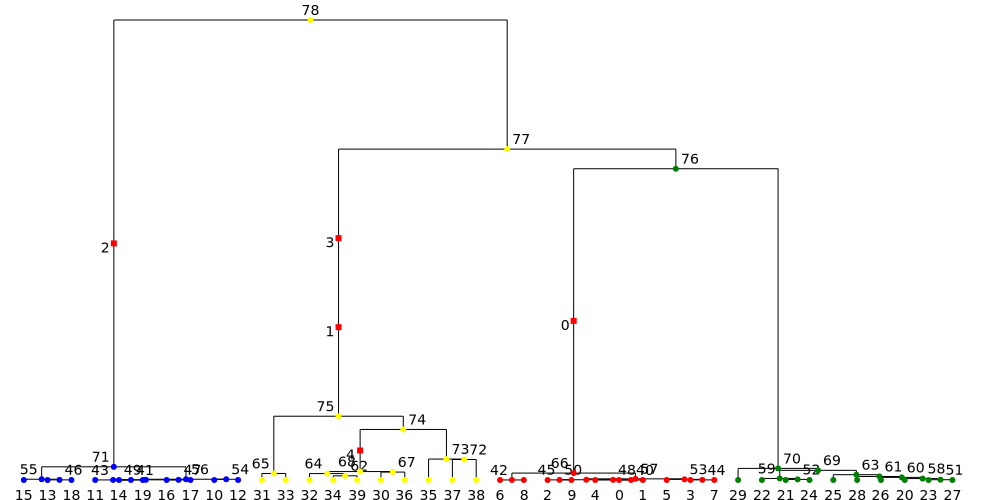

In [448]:
from IPython.display import display_svg
from IPython.display import SVG

#tree_sequence = sim_cl(df)
tree = tree_sequence.trees().next()
print(tree.time(tree.root))
colour_map = {0:"red", 1:"blue", 2:"green", 3:"yellow"}
node_colours = {u: colour_map[tree.population(u)] for u in tree.nodes()}
SVG(tree.draw(height=500, width=1000, node_colours=node_colours))

In [130]:
import math
def out_of_africa():
    # First we set out the maximum likelihood values of the various parameters
    # given in Table 1.
    N_A = 7300
    N_B = 2100
    N_AF = 12300
    N_EU0 = 1000
    N_AS0 = 510
    # Times are provided in years, so we convert into generations.
    generation_time = 25
    T_AF = 220e3 / generation_time
    T_B = 140e3 / generation_time
    T_EU_AS = 21.2e3 / generation_time
    # We need to work out the starting (diploid) population sizes based on
    # the growth rates provided for these two populations
    r_EU = 0.004
    r_AS = 0.0055
    N_EU = N_EU0 / math.exp(-r_EU * T_EU_AS)
    N_AS = N_AS0 / math.exp(-r_AS * T_EU_AS)
    # Migration rates during the various epochs.
    m_AF_B = 25e-5
    m_AF_EU = 3e-5
    m_AF_AS = 1.9e-5
    m_EU_AS = 9.6e-5
    # Population IDs correspond to their indexes in the population
    # configuration array. Therefore, we have 0=YRI, 1=CEU and 2=CHB
    # initially.
    population_configurations = [
        msprime.PopulationConfiguration(
            sample_size=0, initial_size=N_AF),
        msprime.PopulationConfiguration(
            sample_size=5, initial_size=N_EU, growth_rate=r_EU),
        msprime.PopulationConfiguration(
            sample_size=5, initial_size=N_AS, growth_rate=r_AS)
    ]
    migration_matrix = [
        [      0, m_AF_EU, m_AF_AS],
        [m_AF_EU,       0, m_EU_AS],
        [m_AF_AS, m_EU_AS,       0],
    ]
    demographic_events = [
        # CEU and CHB merge into B with rate changes at T_EU_AS
        msprime.MassMigration(
            time=T_EU_AS, source=2, destination=1, proportion=1.0),
        msprime.MigrationRateChange(time=T_EU_AS, rate=0),
        msprime.MigrationRateChange(
            time=T_EU_AS, rate=m_AF_B, matrix_index=(0, 1)),
        msprime.MigrationRateChange(
            time=T_EU_AS, rate=m_AF_B, matrix_index=(1, 0)),
        msprime.PopulationParametersChange(
            time=T_EU_AS, initial_size=N_B, growth_rate=0, population_id=1),
        # Population B merges into YRI at T_B
        msprime.MassMigration(
            time=T_B, source=1, destination=0, proportion=1.0),
        # Size changes to N_A at T_AF
        msprime.PopulationParametersChange(
            time=T_AF, initial_size=N_A, population_id=0)
    ]
    # Use the demography debugger to print out the demographic history
    # that we have just described.
    dd = msprime.DemographyDebugger(
        population_configurations=population_configurations,
        migration_matrix=migration_matrix,
        demographic_events=demographic_events)
    dd.print_history()
    tree_sequence = msprime.simulate(length = 500,\
                                     Ne = 0.5,\
                                     mutation_rate = .00000001,\
                                     population_configurations = population_configurations,\
                                     demographic_events = demographic_events)
    return tree_sequence


Epoch: 0 -- 848.0 generations
     start     end      growth_rate |     0        1        2    
   -------- --------       -------- | -------- -------- -------- 
0 |1.23e+04 1.23e+04              0 |     0      3e-05   1.9e-05 
1 |2.97e+04   1e+03           0.004 |   3e-05      0     9.6e-05 
2 |5.41e+04    510           0.0055 |  1.9e-05  9.6e-05     0    

Events @ generation 848.0
   - Mass migration: lineages move from 2 to 1 with probability 1.0
   - Migration rate change to 0 everywhere
   - Migration rate change for (0, 1) to 0.00025
   - Migration rate change for (1, 0) to 0.00025
   - Population parameter change for 1: initial_size -> 2100 growth_rate -> 0 
Epoch: 848.0 -- 5600.0 generations
     start     end      growth_rate |     0        1        2    
   -------- --------       -------- | -------- -------- -------- 
0 |1.23e+04 1.23e+04              0 |     0     0.00025     0    
1 | 2.1e+03  2.1e+03              0 |  0.00025     0        0    
2 |   510   2.27e-09      

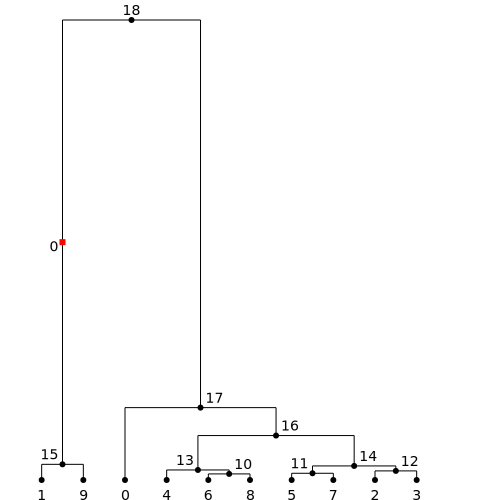

In [131]:
tree_sequence = out_of_africa()
t = tree_sequence.trees().next()
t.draw()
SVG(t.draw(height=500, width=500))

# msprime testing

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import msprime
import numpy as np
import scipy
import multiprocessing
import matplotlib.pyplot as plt

from IPython.display import SVG

In [10]:
N = 1000
T_mrca = np.zeros(N)
for j, ts in enumerate(msprime.simulate(100, num_replicates=N)):
    tree = ts.first()
    T_mrca[j] = tree.time(tree.root)
np.mean(T_mrca), np.var(T_mrca)

(3.8821563949513407, 4.160382660586996)

In [3]:
def pairwise_T_mrca(Ne):
    N = 10000
    T_mrca = np.zeros(N)
    for j, ts in enumerate(msprime.simulate(2, Ne=Ne, num_replicates=N)):
        tree = ts.first()
        T_mrca[j] = tree.time(tree.root)
    return np.mean(T_mrca)

pairwise_T_mrca(0.5), pairwise_T_mrca(1), pairwise_T_mrca(10), pairwise_T_mrca(100)

(1.004957000860747, 2.0059037820645753, 19.690823420361905, 202.37780291907373)

In [914]:
## We can show that as the sample size k → ∞, Var(TMRCA)
## converges to 4π^2/3 − 12 ≈ 1.16 (in coalescent units).

## The rate of genetic drift per time unit in the Moran model is equal to 2/N^2,
## therefore we can scale to WF by considering generation time as N time steps.
def pairwise_T_mrca(growth_rate):
    N = 10000
    T_mrca = np.zeros(N)    
    replicates = msprime.simulate(
        population_configurations=[
             msprime.PopulationConfiguration(
                sample_size=5, initial_size=1, growth_rate=growth_rate)], 
        num_replicates=N, random_seed=100)
    for j, ts in enumerate(replicates):
        tree = ts.first()
        T_mrca[j] = tree.time(tree.root)
    return np.mean(T_mrca)

pairwise_T_mrca(.05), pairwise_T_mrca(0), pairwise_T_mrca(-0.05)

(2.8496233683482766, 3.14757628439682, 3.608938710612632)

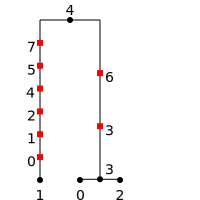

In [11]:
ts = msprime.simulate(3, Ne=1, mutation_rate=1)
tree = ts.first()
SVG(tree.draw())

In [41]:
N = 1000
theta = 5
S = np.zeros(N)
replicates = msprime.simulate(10, Ne=.5, mutation_rate=theta/2., num_replicates=N)
for j, ts in enumerate(replicates):
    S[j] = ts.num_sites  # Number of segregrating sites.
np.mean(S)

13.657

In [38]:
def sim_cl(forward_info):
    ## Build the nasty msprime command for species all related
    ## by local speciation. Run the msprime, and gather summary
    ## statistics

    ## Get species objects for each species in this clade
    clade_species = [species.from_df(pd.DataFrame(forward_info[x])) for x in forward_info]
    print("Got clade_species:\n{}".format(clade_species))

    ## Get msprime PopulationConfigurations per species
    ## Not sure why this has to be a dict...
    local_configs = [x._get_local_configuration() for x in clade_species]
    for idx, x in enumerate(local_configs):
        local_configs[idx].sample_size = 5
    print("Got local_configs:\n{}".format(local_configs))

    ## Get msprime Population Configuration for the metacommunity
    meta_config = clade_species[0]._get_meta_configuration()
    meta_config.initial_size = 1000
    meta_config.sample_size = 5

    ## We need the founder index because we're going to throw all
    ## lineages back into this pop prior to the mass migration back
    ## to the metacommunity
    configs = local_configs
    print(configs)
    configs = configs[::-1]
    founder_idx = len(configs) - 1
    configs.append(meta_config)
    meta_idx = len(configs) -1

    ## Get all size change events for all species
    size_changes = []
    for idx, spec in enumerate(clade_species):
        change_events = spec._get_size_changes_through_time(pop_id = idx)
        size_changes.extend(change_events)
    #print("Filled size_changes:\n{}".format(size_changes))
    
    ## Events must be sorted from most recent to most ancient
    size_changes = sorted(size_changes, key=lambda x: x.time)
    divtime = size_changes[-1].time

    ## Blank the size_changes for now
    size_changes = []
    ## Throw all lineages back into the initial founder lineage
    ## If there are more than two lineages (local founder and 
    ## metacommunity) then we need to collapse all lineages back
    ## into the founder before we throw them back to the metacommunity
    divergence_events = []
    if len(configs) > 2:
        for idx in range(len(configs[:-2])):
            split_event = msprime.MassMigration(time = divtime - 1,\
                                                source = idx,\
                                                destination = founder_idx,\
                                                proportion = 1)
            divergence_events.append(split_event)

    ## Get the mass migration
    local_meta_split = clade_species[::-1][-1]._get_local_meta_split(founder_idx = founder_idx,\
                                                               meta_idx = meta_idx)
    size_changes.extend(divergence_events)
    size_changes.extend(local_meta_split)
    #print(size_changes)
    print("\n".join(["{}".format([x]) for x in size_changes]))
    
    ##TODO: Figure out the migration matrix
    try:
        debug = msprime.DemographyDebugger(population_configurations = configs,\
                                           #migration_matrix = migmat,\
                                           demographic_events = size_changes)
    except Exception as inst:
        print(inst)
        raise
    debug.print_history()
    tree_sequence = msprime.simulate(length = clade_species[0].paramsdict["sequence_length"],\
#                                     Ne = clade_species[0].stats["Ne_local"],\
                                     Ne = 1,\
#                                     mutation_rate = clade_species[0].paramsdict["mutation_rate"],\
                                     mutation_rate = 0.0000001,\
                                     population_configurations = configs,\
                                     demographic_events = size_changes)
    return tree_sequence

df1 = isl1.local_info[clades["t776"]]
df2 = isl1.local_info[clades["t130"]]
df3 = isl1.local_info[clades["t177"]]

wat = [{isl1.current_time - x:y*1000 for x, y in isl1.local_info[z]["abundances_through_time"].items()} for z in df.columns]
print(wat)
df.loc["abundances_through_time"] = wat
tree_sequence1 = sim_cl(df1)
#tree_sequence2 = sim_cl(df2)
#tree_sequence3 = sim_cl(df3)

KeyError: 't776'

71169.1306892


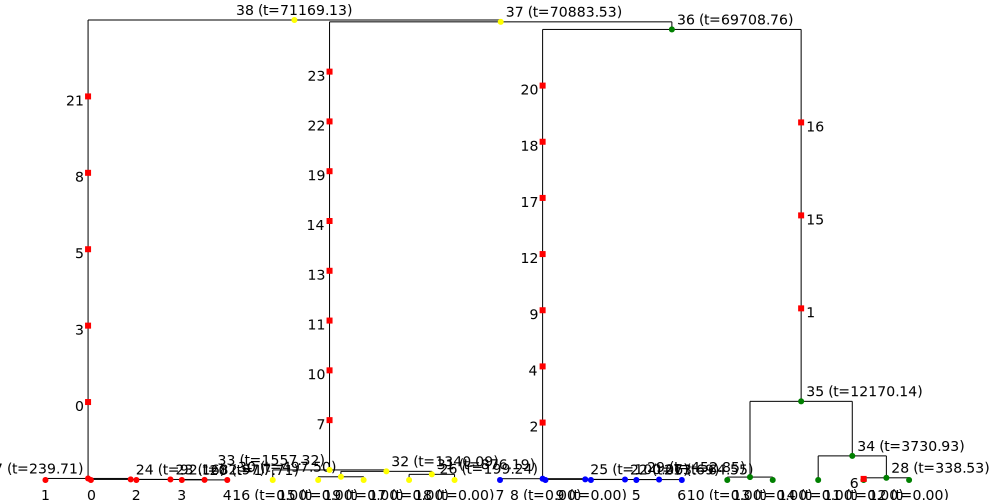

In [490]:
from IPython.display import display_svg
from IPython.display import SVG

#tree_sequence = sim_cl(df)
tree = tree_sequence3.trees().next()
print(tree.time(tree.root))
colour_map = {0:"red", 1:"blue", 2:"green", 3:"yellow"}
node_colours = {u: colour_map[tree.population(u)] for u in tree.nodes()}
node_labels = {
    u: (str(u) if u < 8 else "{} (t={:.2f})".format(u, tree.time(u))) 
    for u in tree.nodes()}
SVG(tree.draw(height=500, width=1000, node_labels=node_labels, node_colours=node_colours))

# Trying to construct an unfucked genealogy

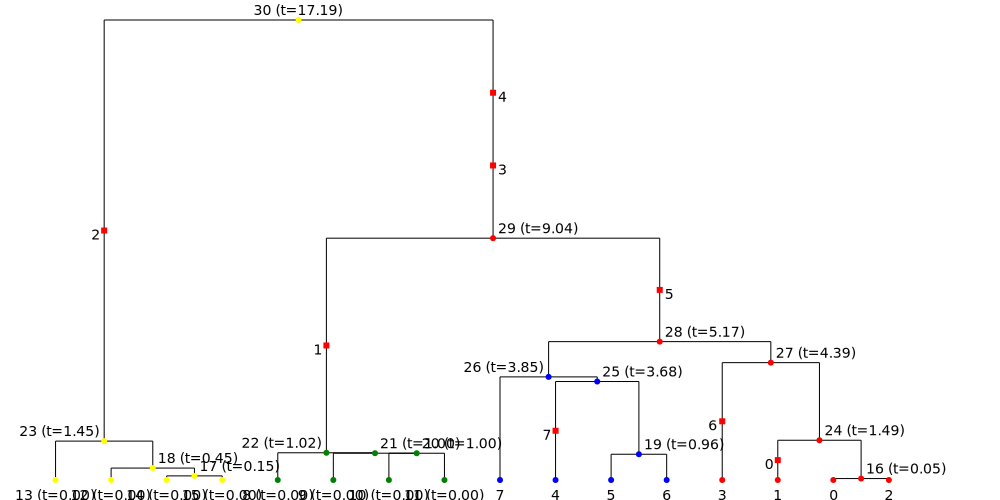

In [49]:
sample_size = 4
pop_configs = [
    msprime.PopulationConfiguration(sample_size=sample_size, initial_size = 1),
    msprime.PopulationConfiguration(sample_size=sample_size, initial_size = 2),
    msprime.PopulationConfiguration(sample_size=sample_size, initial_size = 3),
    msprime.PopulationConfiguration(sample_size=sample_size, initial_size = 5)]
demographic_events=[
    msprime.PopulationParametersChange(time=1, initial_size=.01, population_id=2),
    msprime.PopulationParametersChange(time=4, initial_size=.1, population_id=1),
    msprime.MassMigration(5, source=1, dest=0, proportion=1),
    msprime.MassMigration(8, source=2, dest=0, proportion=1),    
    msprime.PopulationParametersChange(time=9, initial_size=.1, population_id=0),
    msprime.MassMigration(10, source=0, dest=3, proportion=1)]

ts  = msprime.simulate(
                    population_configurations=pop_configs,
                    record_migrations=True,
                    demographic_events=demographic_events,
                    mutation_rate=.2)
tree = ts.first()
colour_map = {0:"red", 1:"blue", 2: "green", 3:"yellow"}
node_colours = {u: colour_map[tree.population(u)] for u in tree.nodes()}
node_labels = {
    u: (str(u) if u < 8 else "{} (t={:.2f})".format(u, tree.time(u))) 
    for u in tree.nodes()}
SVG(tree.draw(height=500, width=1000, node_labels=node_labels, node_colours=node_colours))

In [773]:
p = pop_configs[0]
p.get_ll_representation

<bound method PopulationConfiguration.get_ll_representation of <msprime.simulations.PopulationConfiguration object at 0x7f96a4cbca90>>

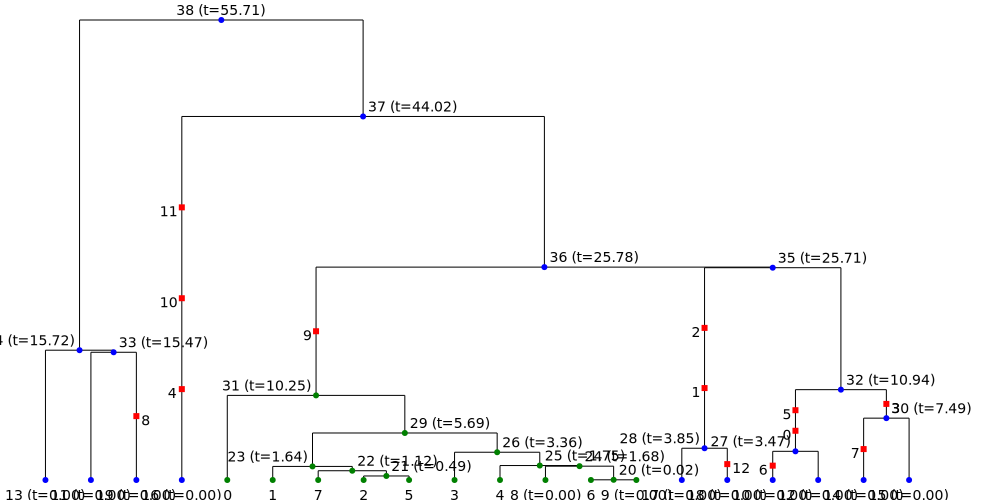

In [120]:
tdiv = 23
nloc = 45 / 10.
nmet = 320 / 10.


sample_size = 10
pop_configs = [
    msprime.PopulationConfiguration(sample_size=sample_size, initial_size = nloc),
    msprime.PopulationConfiguration(sample_size=sample_size, initial_size = nmet)]
demographic_events=[
    msprime.PopulationParametersChange(time=tdiv, initial_size=.1, population_id=0),
    msprime.MassMigration(tdiv + 1, source=0, dest=1, proportion=1)]

ts  = msprime.simulate(
                    population_configurations=pop_configs,
                    record_migrations=True,
                    demographic_events=demographic_events,
                    mutation_rate=.05)
tree = ts.first()
colour_map = {0:"green", 1:"blue", 2: "green", 3:"yellow"}
node_colours = {u: colour_map[tree.population(u)] for u in tree.nodes()}
node_labels = {
    u: (str(u) if u < 8 else "{} (t={:.2f})".format(u, tree.time(u))) 
    for u in tree.nodes()}
SVG(tree.draw(height=500, width=1000, node_labels=node_labels, node_colours=node_colours))

Annoying
asdf
asdf
dsaf
asdf
asdf
asdf
asdf
asd
fasd
fasdf
asdf
asdf
asdf
asdf
asdf
sad
fasd
fasdf
asdf
dsaf
asdf
asdf
asdf
asdf
asd
fasd
fasdf
asdf
asdf
asdf
asdf
asdf
sad
fasd
f